In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def linearBetaMethod(lambd, g, tRange, u0, beta, h):

    n = (tRange[1] - tRange[0]) / h
    tArray = [tRange[0] + (i + beta)*h for i in range(int(n)+1)]
    solArray = [u0]

    ABeta = lambda z: (1 + (1 - beta)*z) / (1 - beta*z)

    for i in tArray:
        uNext = ABeta(lambd*h)*solArray[-1] + (h*g(i)) / (1 - beta*h*lambd)
        solArray.append(uNext)

    return tArray, solArray[:-1]


Consider the test problem (6), with $\lambda = −1$. Verify that you obtain visually the same result
for $\beta = {0, 0.5, 1}$ and $h = 0.0001$ with respect to the analytical solution.

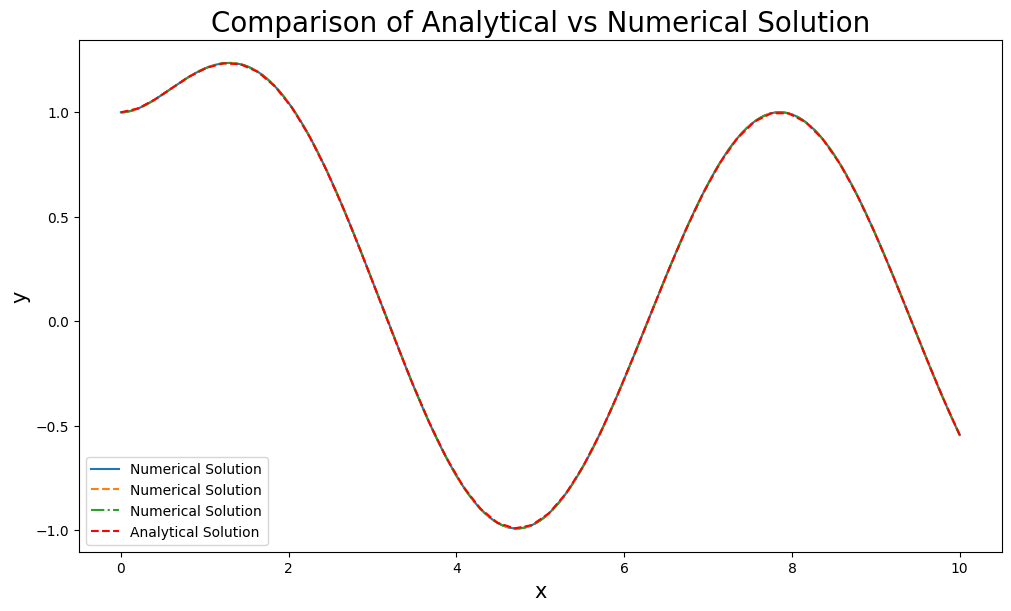

In [6]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -1

x = np.linspace(0,10,50)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t: - Lambda*np.sin(t) + np.cos(t)

style = ['-','--','-.']
bVals = [0.0, 0.5, 1.0]

for i in range(3):
    numSol = linearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=bVals[i], h=0.0001)

    plt.plot(*numSol, label='Numerical Solution', linestyle=style[i])

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')


plt.title('Comparison of Analytical vs Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

## Discussion question A.1:
(a) For $\beta = {0, 0.5, 1}$, compute the approximate solution with $h = 0.5$ and plot the numerical solutions, together with the analytical solution, as function of time in a single figure.
Explain the behavior β-method using the theory discussed in the tutorial.

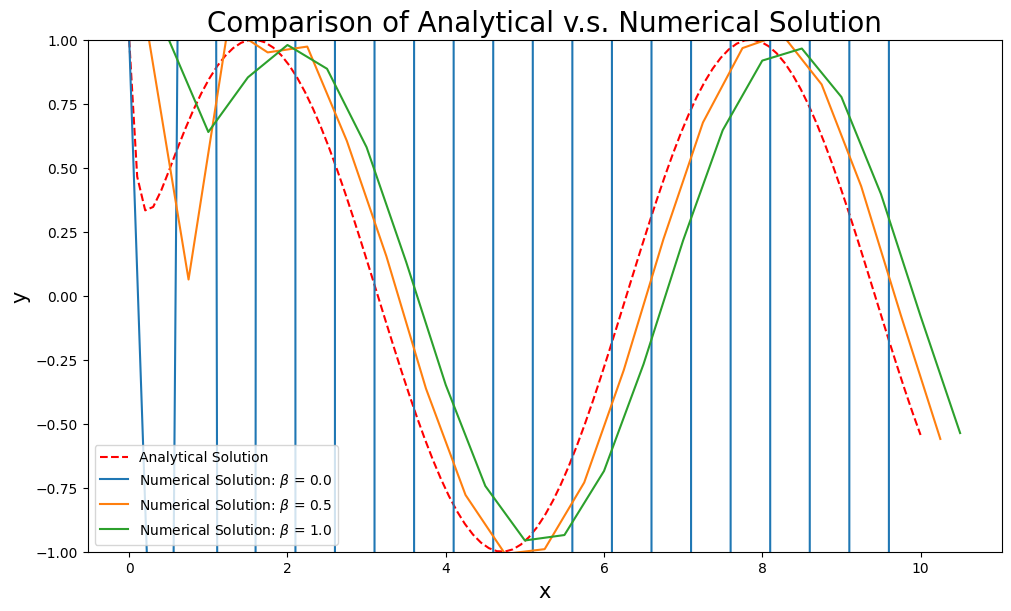

In [7]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -10

x = np.linspace(0, 10, 100)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)
plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')


g = lambda t: - Lambda*np.sin(t) + np.cos(t)

for b in [0.0, 0.5, 1.0]:
    numSol = linearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=b, h=0.5)

    plt.plot(*numSol, label=f'Numerical Solution: $ \\beta $ = {b}')


plt.ylim(-1,1)
plt.title('Comparison of Analytical v.s. Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

The stability of the $\beta$-method can either be conditionally asymptotically stable, or unconditionally stable:
- $\beta = 0$ -> Conditional stability
- $0< \beta < 1/2$ -> Conditional stability
- $ 1/2 \leq \beta \leq 1$ -> Unconditional stability

No surprise that the $\beta=0.5, 1.0$ methods are stable. The $\beta=0$ method is unstable because the time-step $h$ is too big. In order for the $\beta = 0$ method to be stable, it must follow:
$$h < \frac{-2 Re(\lambda)}{|\lambda|^2}=0.2,$$ which it does not.

(b) Repeat the computation and the explanation from above but now using $h = 0.125$.

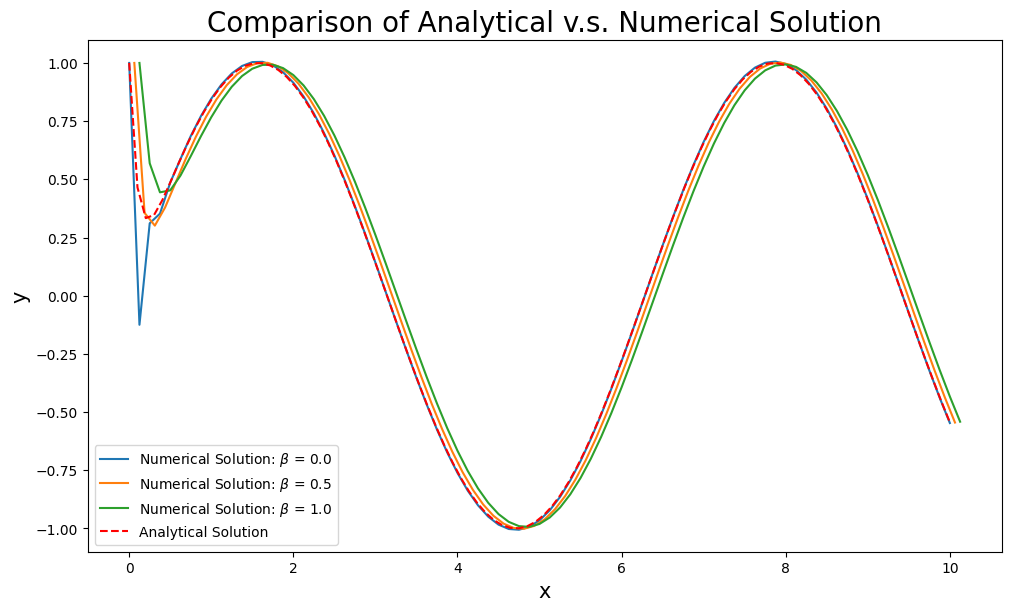

In [8]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -10

x = np.linspace(0, 10, 100)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t:  - Lambda*np.sin(t) + np.cos(t)

for b in [0.0, 0.5, 1.0]:
    numSol = linearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=b, h=0.125)

    plt.plot(*numSol, label=f'Numerical Solution: $ \\beta $ = {b}')

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')

plt.ylim(-1.1,1.1)
plt.title('Comparison of Analytical v.s. Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

For this specfic case we are using $λ=-10$, thus we get the following bound $h < 0.2$ which is satisfied as we take $h=0.125$. From the plot we can see that the method converges for $β=0$ also.

# B Accuracy of the $\beta$-method
Consider the test problem (6), with λ = −1.

## Discussion question B.1:
(a) Plot the error between the exact solution together with the approximate solutions using
β = 0, 0.5, 1 and h = 0.5 over time, using semilogy. Include the right-hand-side of (5)
for each β = 0, 0.5, 1. Which value of β leads to the smaller error?

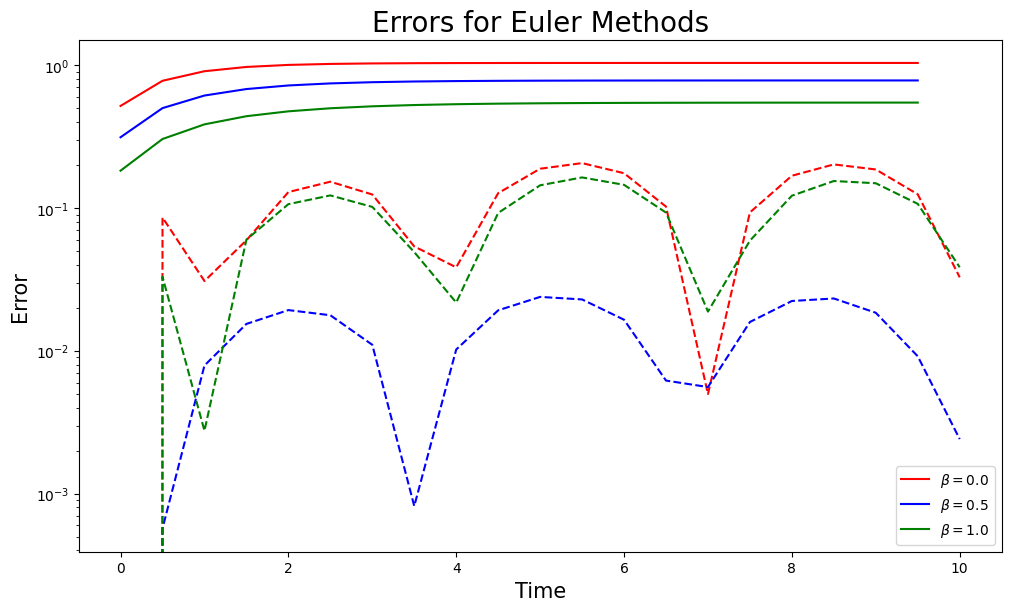

In [9]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

Lambda = -1.0
h = 0.5
tRange = [0, 10]
beta = 0.5

f = lambda t,y: Lambda*y + g(t)

analSol = lambda t: np.exp(Lambda*t) + np.sin(t)


colors = ['red', 'blue', 'green']

m = 0
for beta in [0.0, 0.5, 1.0]:
    ampFactor = ( 1 + (1 - beta)*h*Lambda ) / ( 1 - beta*h*Lambda )


    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tn = np.array([tRange[0] + n*h for n in range(nLim+1)])
    yn = analSol(tn)


    tBeta = np.array(linearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[0])
    approxSols = np.array(linearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[1])

    numError = abs(yn - approxSols)

    plt.semilogy(tn, numError, c=colors[m], linestyle='--')


    uStar = []


    for i in range(len(yn)-1):
        un = yn[i] + h*f(tn[i], yn[i]*(1-beta) + beta*yn[i+1])

        uStar.append(un)

    tau = yn[:len(uStar)] - uStar
    tauMax = max(tau)

    errorBound = []
    for n in range(len(yn)-1):
        val = ( tauMax / abs(1-beta*h*Lambda) ) * ( ( 1 - abs(ampFactor)**(n+1) ) / ( 1-abs(ampFactor) ) )

        errorBound.append(val)

    plt.semilogy(tn[:len(errorBound)], errorBound, label=f'$ \\beta = {beta}$', c=colors[m])

    m += 1


plt.title('Errors for Euler Methods', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.legend()

plt.show()


# Discussion B.1

a) The smaller error is for $\beta=0.5$, which makes sense considering the truncational errors we calculated during the lecture/tutorial. For $\beta=1/2$ the truncational error scales with $O(h^3)$ rather than when $O(h^2)$ like for $\beta=1,0$. So the error decreases faster with h for the $\beta=1/2$ method.

The slope of 0.0 is 0.9724213154657195
The slope of 0.5 is 1.9814776310725437
The slope of 1.0 is 1.0108240581194499


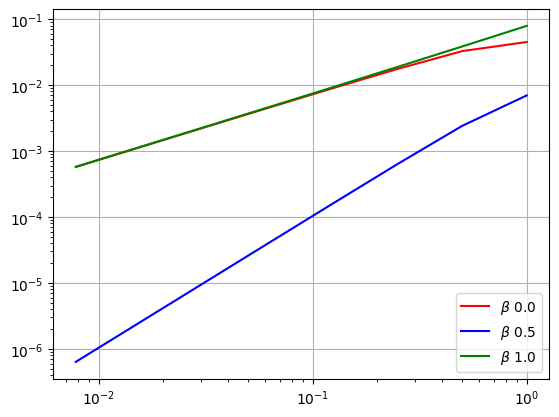

In [10]:
hVals = [2**(-l) for l in range(8)]

m= 0
for beta in [0.0, 0.5, 1.0]:
    numErrorVals=[]

    for h in hVals:
        yn = analSol(tRange[1])

        approxSols = np.array(linearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[1][-1]) #[-1] so we only get the solutions corresponding to t=T

        numError = abs(yn - approxSols)
        numErrorVals.append(numError)
    plt.loglog(hVals, numErrorVals, label = f'$\\beta$ {beta}', c = colors[m])
    m+=1
    bet = [0.0, 0.5, 1.0]

    riseOverRun = ( np.log(numErrorVals[-1]/numErrorVals[1]) ) / ( np.log(hVals[-1] / hVals[1]) )
    print(f'The slope of {beta} is {riseOverRun}')



plt.grid()
plt.legend(loc ='lower right')
plt.show()

## Discussion B.2
**Discuss the differences between the three methods resulting from the three different values of β. Think of the following criteria: order of accuracy, absolute stability, explicit vs. implicit.**

The order of accuracy for $β = 0,1$ is 1, then for $\beta = 1/2$ the order is 2, since it decreases quadratically. Moreover, it is conditionally stable for $\beta=0$, and for  $\beta = 1$ and $\beta = 1/2$ it is unconditionally stable.
Finally, it is explicit (less computational time) for $\beta = 0$ and implicit for $\beta = 1, 1/2$ (more computations needed since the RHS is unkown).

# C The β-method for a system of IVPs


In [11]:
def fpIterator(system, x0, tol=1e-12, maxit=50):
    x = np.array(x0)  # Initialize solution vector
    errEst = []  # Error estimates for each iteration
    xHist = []  # History of solutions

    success = False

    if tol != None:
        errorEstimate = tol + 1
        iteration = 0

        while errorEstimate > tol and iteration < maxit:
            prevSolution = x.copy()  # Store previous solution vector
            x = system(x)  # Compute new solution vector using the system function
            xHist.append(x)

            errorEstimate = np.linalg.norm(x - prevSolution)  # Compute error estimate using numpy.linalg.norm
            errEst.append(errorEstimate)

            iteration += 1

        if errorEstimate <= tol:
            success = True

    else:
        for iteration in range(maxit):
            prevSolution = x.copy()
            x = system(x)
            xHist.append(x)

            errorEstimate = np.linalg.norm(x - prevSolution)
            errEst.append(errorEstimate)

    return x, success, np.array(errEst), np.array(xHist)



def newton(f, df, x0, tol=10e-12, maxit=50):
    system = lambda x: x - np.linalg.inv(df(x)).dot(f(x))

    x, success, errEst, xHist = fpIterator(system, x0, tol, maxit)
    return x, success, errEst, xHist


In [12]:
def BetaMethod(f, tRange, u0, df, beta, h):

    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tArray = np.array([tRange[0] + h*n for n in range(nLim)])

    solArray = [u0]

    for t in tArray:
        un =  solArray[-1]
        F = lambda x: x - un[:len(x)] - h* np.array(f(t + beta*h, (1-beta)*un[:len(x)] + beta * x))
        Jac = lambda x: np.eye(len(u0)) - h*beta*df(t,x)
        uNewton, success = newton(F, Jac, un, tol, maxit)[:2]

        if success == False:
            print('Unsuccessful')
            return tArray[:len(solArray)], solArray
        else:
            solArray.append(uNewton)


    return tArray, solArray


In [13]:
def gravAccF(x, G, M):
    return (-G*M*x) / np.linalg.norm(x,2)**3


def gravAccJac(x, G, M):

    return ( (G*M) / np.linalg.norm(x,2)**3 ) * ( (3*np.matmul(x, x.T) / np.linalg.norm(x,2)**2) - np.eye(3))


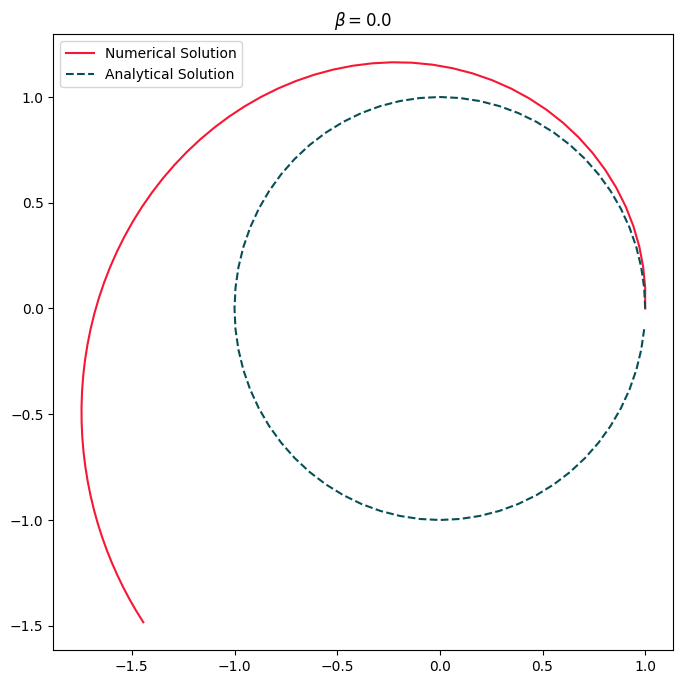

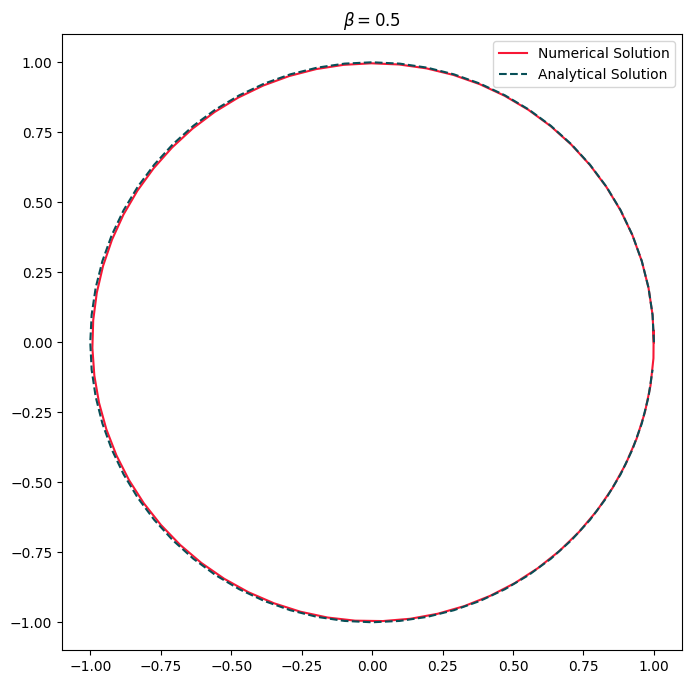

Unsuccessful


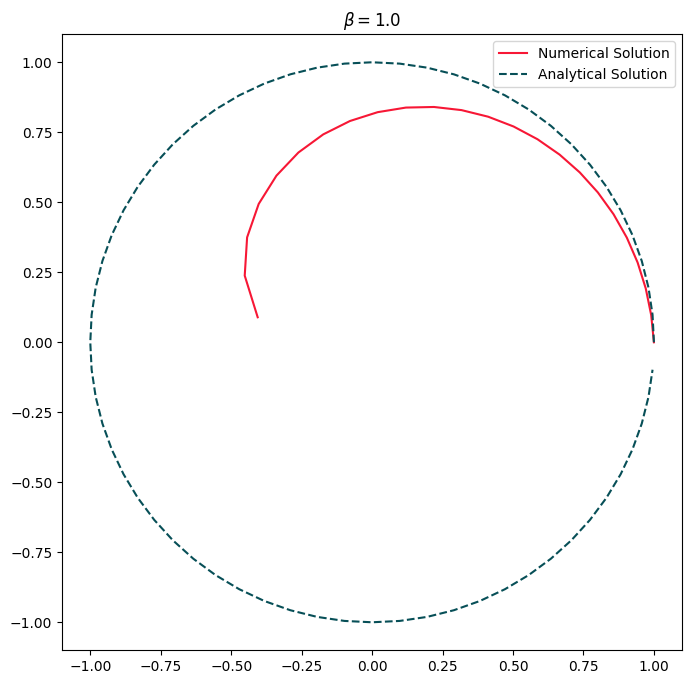

In [14]:
R = 1
M = 1
G = 4 * np.pi**2
tol = 1e-12
maxit = 50
omega = np.sqrt( G*M / R**3 )
period = 2 * np.pi / omega
h = 2**-6 * period
tRange = [0, period]
betas = [0.0, 0.5, 1.0]

f = lambda t, x: np.array([*gravAccF(x[3:], G, M), *x[:3]])
df = lambda t, x: np.block([[np.zeros((3, 3)), gravAccJac(x, G, M) ],
                            [np.eye(3), np.zeros((3, 3))]])

posExact = lambda t: R * np.array([np.cos(omega*t), np.sin(omega*t), 0])
velExact = lambda t: R * np.array([-omega * np.sin(omega*t), omega * np.cos(omega*t), 0])

x0 = posExact(0)
v0 = velExact(0)
vars0 = np.array(np.append(v0,x0))

for beta in betas:

    tArray, solArray = BetaMethod(f, tRange, vars0, df, beta, h)
    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tArrayVals = np.array([tRange[0] + h*n for n in range(nLim)])

    solArray = np.array(solArray)

    xExact = np.array([posExact(t) for t in tArrayVals])
    vExact = np.array([velExact(t) for t in tArrayVals])

    fig = plt.figure(figsize=(8,8))
    plt.plot(solArray[:, 3], solArray[:, 4], label="Numerical Solution", c = '#F71735')
    plt.plot(xExact[:, 0], xExact[:, 1], label="Analytical Solution", linestyle = "dashed", c = '#074F57')

    plt.title(f"$\\beta = {beta}$")
    plt.legend()
    plt.show()


# Discussion C.1:

From the tutorials we have that the angular momentum monotonically increases for $β=0$, is exactly conserved for $β=\frac{1}{2}$ and monotonically decreases for $β=1$.

We also have shown that $||L(v_{exact}(t),x_{exact}(t)||_2=mωR^2$.

In addition, $ω=\sqrt\frac{GM}{R^3}$.

By substituting this into our previous equation we get:
$||L(v_{exact}(t),x_{exact}(t)||_2=m\sqrt{GMR}$

From the latter equality we have that $m$, $M$ and $G$ are fixed values and so if the angular momentum monotonically increases then $R$ has to monotonically increase; if the angular momentum is exactly conserved then $R$ stays constant as well; and if the angular momentum monotonically decreases then $R$ has to monotonically decrease.

This can behaviour is shown in the plots for the orbits given different values of $β$ above.


# Discussion question C.2

Unsuccessful
Unsuccessful
Unsuccessful
Unsuccessful


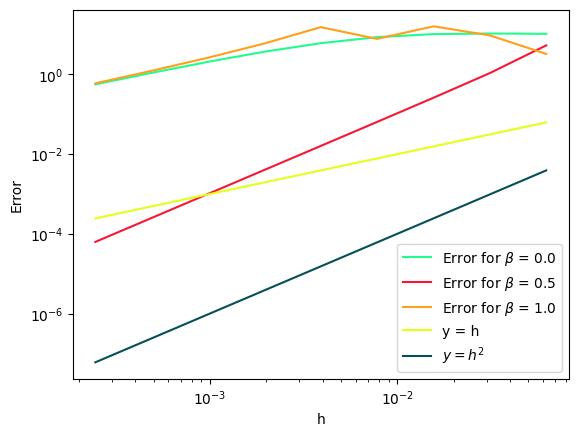

In [15]:
## Discussion question B.2

# set up the inputs of BetaMethod and initialize the error variable

# solve the system using different values of beta and h and store the error

# IMPORTANT: the output of this cell is a single figure with 6 plots, 3 for the
# error and 3 for the corresponding functions to compare the slopes (for beta
# equal to 0 and 1 they will be the same)

hVals = np.array([2**-l * period for l in range(4,13)])

R = 1
M = 1
G = 4 * np.pi**2
omega = np.sqrt( G*M / R**3 )
period = 2 * np.pi / omega
tRange = [0, period]
betas = [0.0, 0.5, 1.0]
beta = 0.5

f = lambda t, x: np.array([*gravAccF(x[3:], G, M), *x[:3]])
df = lambda t, x: np.block([[np.zeros((3, 3)), gravAccJac(x, G, M) ],
                            [np.eye(3), np.zeros((3, 3))]])

posExact = lambda t: R * np.array([np.cos(omega*t), np.sin(omega*t), 0])
velExact = lambda t: R * np.array([-omega * np.sin(omega*t), omega * np.cos(omega*t), 0])

x0 = posExact(0)
v0 = velExact(0)
vars0 = np.array(np.append(v0,x0))
colours = ['#20FC8F', '#F71735', '#FF9F1C']
m = 0
for beta in betas:

    normErrorPlot =[]
    xAndvExact = []

    for h in hVals:

        tArray, solArray = BetaMethod(f, tRange, vars0, df, beta, h)
        nLim = int( ( tRange[1] - tRange[0] ) / h )
        tArrayVals = np.array([tRange[0] + h*n for n in range(nLim)])

        solArray = np.array(solArray)

        xExact = np.array([posExact(period)])
        vExact = np.array([velExact(period)])
        xAndvExact = np.concatenate((vExact, xExact), axis=1)
        error = abs(xAndvExact - solArray[-1])

        normError = np.linalg.norm(error, 2)
        normErrorPlot.append(normError)
    plt.loglog(hVals, normErrorPlot[:len(hVals)], label = f'Error for $\\beta$ = {beta}', c = colours[m])

    m += 1
plt.loglog(hVals, hVals, label = 'y = h', c = '#E4FF1A')
plt.loglog(hVals, [h**2 for h in hVals], label = '$y = h^2$', c = '#074F57')
plt.ylabel('Error')
plt.xlabel('h')
plt.legend(loc = 'lower right')
plt.show()

In this case we can see a similar behaviour as in part A becuase both values of $β=0$ and $β=1$ behave similarly and they have a slope close to the one of $y=h$. On the other hand, $β=\frac{1}{2}$ has a similar slope to $y=h^2$ because its truncation error has a factor of $h$ more with respect to those of the other values of $β$.